In [1]:
import rapids_singlecell as rsc
import anndata as ad
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import os
import cupyx as cpx
import scipy

/mnt/scratch1/miniconda3/envs/rsc-luke/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata = ad.read_h5ad('adata.h5ad')
print(adata)

rsc.get.anndata_to_GPU(adata)

/home/lzhang36/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 1260074 × 5042
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'batch', 'n_counts'
    uns: 'log1p', 'pca', 'spatial'
    obsm: 'X_pca', 'X_pca_harmony', 'spatial'
    varm: 'PCs'


neighborhood done!
umap done!
leiden done!


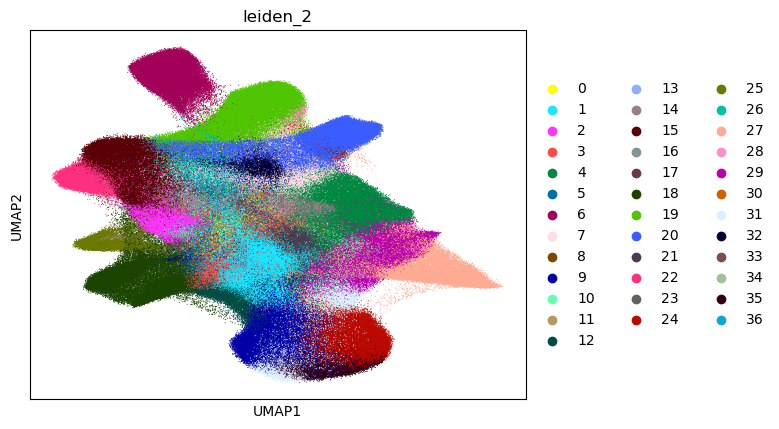

In [4]:
adata.obsm['X_pca'] = adata.obsm['X_pca_harmony']
rsc.pp.neighbors(adata, use_rep='X_pca')
print('neighborhood done!')
rsc.tl.umap(adata)
print('umap done!')
# rsc.tl.leiden(adata, resolution=0.5, key_added='leiden_0.5')
# rsc.tl.leiden(adata, resolution=1, key_added='leiden_1')
rsc.tl.leiden(adata, resolution=2, key_added='leiden_2')
print('leiden done!')
# sc.pl.umap(adata, color='leiden_0.5', size=2)
# sc.pl.umap(adata, color='leiden_1', size=2)
sc.pl.umap(adata, color='leiden_2', size=2)

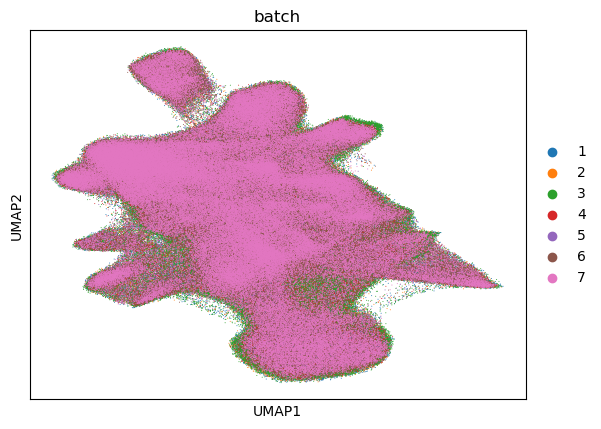

In [8]:
sc.pl.umap(adata, color='batch', size=2)

In [11]:
adata.write_h5ad('adata.h5ad')

/home/lzhang36/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/mnt/scratch1/miniconda3/envs/rsc-luke/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/mnt/scratch1/miniconda3/envs/rsc-luke/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:429: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/mnt/scratc

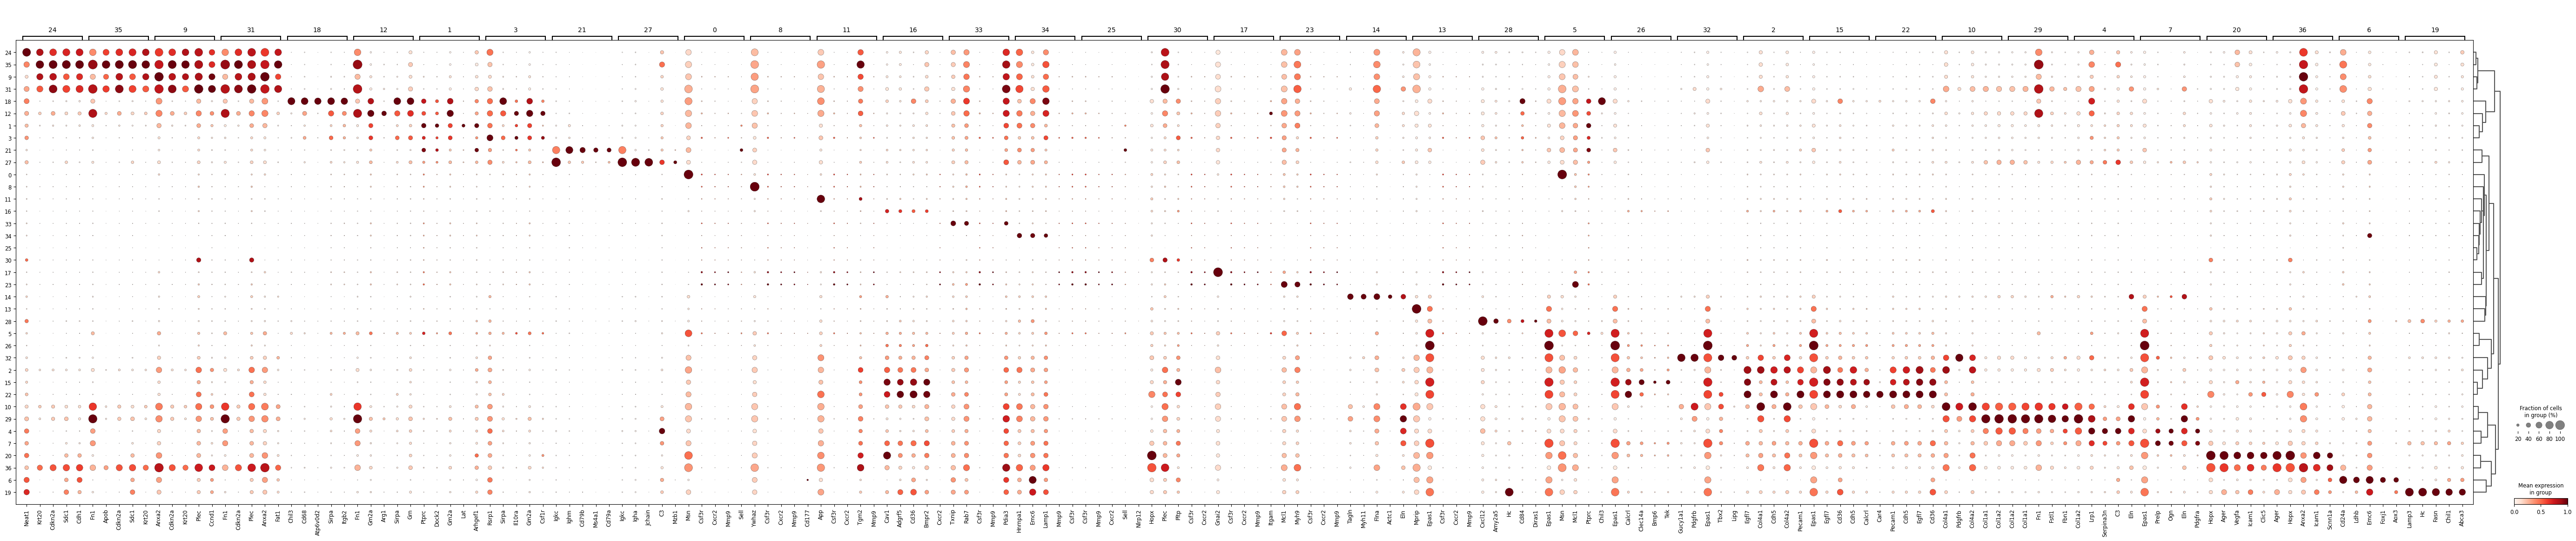

In [9]:
adata = ad.read_h5ad('adata.h5ad')
# sc.tl.rank_genes_groups(adata,'leiden_1',key_added='rank_genes_groups_1',method="wilcoxon")
sc.tl.rank_genes_groups(adata,'leiden_2',key_added='rank_genes_groups_2',method="wilcoxon")
'''sc.pl.rank_genes_groups_dotplot(
    adata, groupby="leiden_1", standard_scale="var", n_genes=5, key='rank_genes_groups_1'
)'''
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="leiden_2", standard_scale="var", n_genes=5, key='rank_genes_groups_2'
)

In [12]:
dfs = []
for cluster in adata.obs['leiden_2'].unique().tolist():
    df_cluster = sc.get.rank_genes_groups_df(adata,group=cluster,key='rank_genes_groups_2').head(20)
    df_cluster['cluster'] = cluster
    dfs.append(df_cluster)
df_ranked_genes = pd.concat(dfs, ignore_index=True)
df_ranked_genes.head()

,names,scores,logfoldchanges,pvals,pvals_adj,cluster
0,Anxa2,378.528748,2.585865,0.0,0.0,9
1,Cdkn2a,285.547058,2.898439,0.0,0.0,9
2,Krt20,265.191833,3.116636,0.0,0.0,9
3,Plec,238.072296,1.713411,0.0,0.0,9
4,Ccnd1,217.552368,2.068178,0.0,0.0,9


In [13]:
df_ranked_genes.to_csv('Bo_RankedGenes.csv',index=False)